In [1]:
from single_sqrb import Single_SQRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim

In [ ]:
# select parameters and build experiment

n_qubits = 8
seq_lengths = [6, 24]
seq_reps = 10
filename = 'exp_single_SQRB_example.p'
qubit_length_groups = {
    0: 1,
    1: 1,
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 6,
    7: 6
}
interleave_operation = 'transport'

exp = Single_SQRB_Experiment(
    n_qubits, 
    seq_lengths, 
    seq_reps, 
    qubit_length_groups,
    interleave_operation,
    filename=filename
)
exp.add_settings()

In [10]:
# Setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    p_2q=1e-2,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [11]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/single_sqrb.py:452: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))
/Users/charles.baldwin/Documents/GitHub/circuit-benchmarks-guppy/single_sqrb.py:324: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_func, x, y, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))


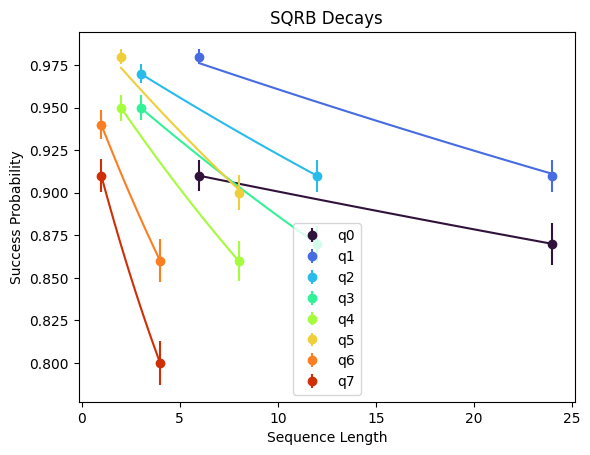

Average Fidelities
------------------------------
qubit 0: 0.997157 +/- 0.001132
qubit 1: 0.995939 +/- 0.000505
qubit 2: 0.99247 +/- 0.001297
qubit 3: 0.989243 +/- 0.001601
qubit 4: 0.981746 +/- 0.002814
qubit 5: 0.986539 +/- 0.001477
qubit 6: 0.967649 +/- 0.005942
qubit 7: 0.950556 +/- 0.007569
------------------------------
Qubit length 1 Average: 0.996548 +/- 0.00062
Qubit length 2 Average: 0.990856 +/- 0.00103
Qubit length 3 Average: 0.984143 +/- 0.001589
Qubit length 6 Average: 0.959103 +/- 0.004811


In [12]:
exp.analyze_results()

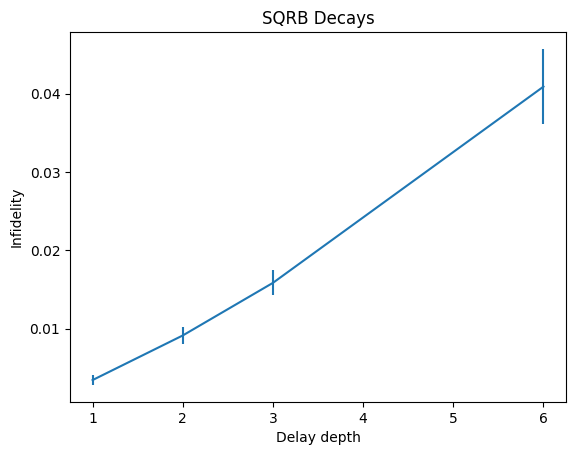

In [13]:
exp.plot_scaling()

In [14]:
# save experiment object to working directory

exp.save()